# Predicting Medical Insurance Costs

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1624023731031-042ed4fb13b3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1032&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>

In this project, we will analyze the [Medical Cost Data Set](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) available on Kaggle. The dataset includes details about individual medical insurance bills, along with demographic and personal characteristics of the recipients. Our primary focus will be on developing a predictive model to determine the relationship between these various attributes and the total medical cost.

Given that the cost is a continuous and positive variable, we will use linear regression to construct the best possible predictive model. The aim is to generate an accurate prediction of the medical costs based on patient information. Accurate cost predictions play a crucial role in hospitals' ability to anticipate revenue and plan necessary medical procedures for their patient population.

## Data Overview

Let's take a closer look at the columns used in the dataset:

- `age`: Age of primary beneficiary
- `sex`: Insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking (yes, no)
- `region`: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- `charges`: Individual medical costs billed by health insurance

### Import Libraries and Load Data

To begin our analysis, we will need to import the necessary libraries and read in the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Load the dataset
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploring the Dataset

Before proceeding with our analysis, we will examine some key features of the dataset. This includes the number of rows and columns, as well as relevant information about the individual columns such as their data type and whether they contain missing values.

In [3]:
# Num of rows and columns
print(f'Number of rows: {insurance.shape[0]}')
print(f'Number of columns: {insurance.shape[1]}')

Number of rows: 1338
Number of columns: 7


In [4]:
# Information about columns in the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset comprises of 1338 rows and 7 columns. Out of these columns, three are categorical (`sex`, `smoker`, and `region`), while the remaining are numerical.

Notably, all the columns are free of any missing values.

We will now examine the descriptive statistics of the numeric columns, which provide us with a summary of the distribution's central tendency, dispersion, and shape.

In [5]:
# Calculate descriptive statistics
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The descriptive statistics of the dataset contains 4 numerical columns, namely `age`, `bmi`, `children`, and `charges`.

- `age`: The mean age of the patients in the dataset is 39 years, with a standard deviation of 14 years. The youngest patient is 18 years old, while the oldest is 64 years old.
- `bmi`: The mean BMI (body mass index) of the patients is 30.66, with a standard deviation of 6.1. The minimum BMI is 15.96, while the maximum BMI is 53.13.
- `children`: The average number of children a patient has is 1.09, with a standard deviation of 1.21. The minimum number of children is 0, while the maximum number of children is 5.
- `charges`:  The mean medical cost for a patient is 13270.42, with a standard deviation of 12110.01. The minimum medical cost is 1121.87, while the maximum medical cost is 63770.43.

The `charges` column in our dataset represents the outcome variable, while the other columns serve as potential predictors for our model.

To better understand the distribution of our outcome variable, we will plot a histogram:

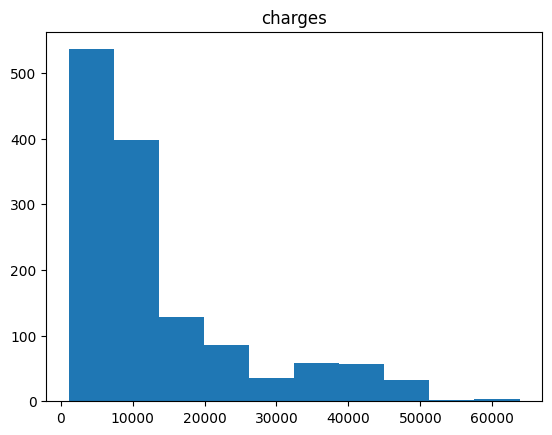

In [6]:
insurance.hist('charges', grid=False)
plt.show()

Upon analyzing the histogram plot, we can observe that the distribution is skewed to the right, indicating a long tail of high-value charges. This suggests that the charges column is likely to be right-skewed, which we can further confirm through descriptive statistics.

We'll use linear regression model and it is often recommended to use the log-transformed outcome variable when the original variable has a highly skewed distribution or contains extreme values. This is because linear regression assumes that the errors are normally distributed and have constant variance. Using the log-transformed outcome variable can help to reduce the influence of extreme values and improve the normality and homoscedasticity of the errors. Therefore, it may be beneficial to use the log-transformed `charges` variable for model training, evaluation, and prediction.

Let's perform a transformation on the column and examine how it impacts the distribution of the data in `charges`.

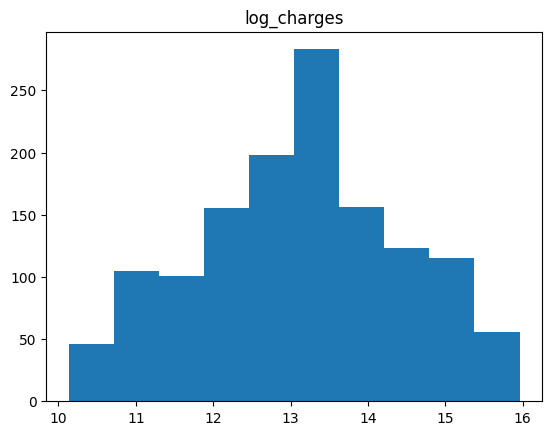

In [7]:
# Apply log-transformation on 'charges'
insurance['log_charges'] = np.log2(insurance['charges'])

# Plot histogram for 'log_charges'
insurance.hist('log_charges', grid=False)
plt.show()

The log-transformed values of the `charges` column are now more centralized, aligning with our intended goal. This indicates that the errors in our model will be less biased.

Our initial step towards developing a linear model is to explore the `insurance` dataset. We will identify variables that exhibit a strong correlation with the outcome, making them ideal candidates for use in a predictive linear regression model. In the event that we encounter two highly correlated predictors, we will assess both and select the one that produces the best model.

Through exploration of the `insurance` dataset, we aim to select relevant predictors that hold the potential to feature in our linear model.

Let's examine the correlation between each of the predictor variables and the outcome variable in the dataset:

- We will take note of any predictors that demonstrate a strong correlation with the outcome, and assess any noticeable patterns in the correlation relationships.
- We will also be on the lookout for predictors that demonstrate high correlation with each other, and will take note of such instances.

In [8]:
# Find correlation between numerical columns
insurance.corr()

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


After analyzing the correlation table, the following observations can be made:

- There is a positive correlation between `age` and `charges`, meaning that as age increases, the charges also increase.
- The correlation between `bmi` and `charges` is also positive, but not as strong as the correlation between `age` and `charges`.
- The `children` column has a weak correlation with `charges`, which means that having more or fewer children does not have a significant impact on charges.
- There is a strong positive correlation between `charges` and `log_charges`. This is expected because `log_charges` is the logarithmic transformation of `charges`.

Let's focus on categorical variables. In linear regression, they show changes in the average outcome for non-reference categories. We can plot histograms of the outcome stratified by different categories to see if using them is useful. If there's a significant change, the categorical variable might be worth including.

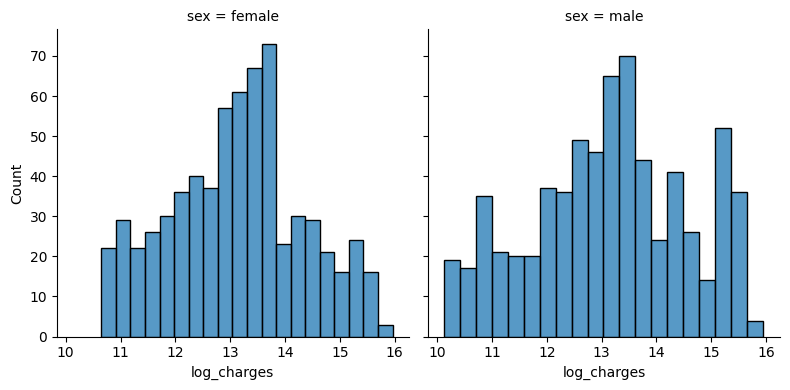

In [9]:
# Create a histogram stratified by sex
g = sns.FacetGrid(insurance, col='sex', height=4, aspect=1)
g.map(sns.histplot, 'log_charges', kde=False, bins=20)
plt.show()

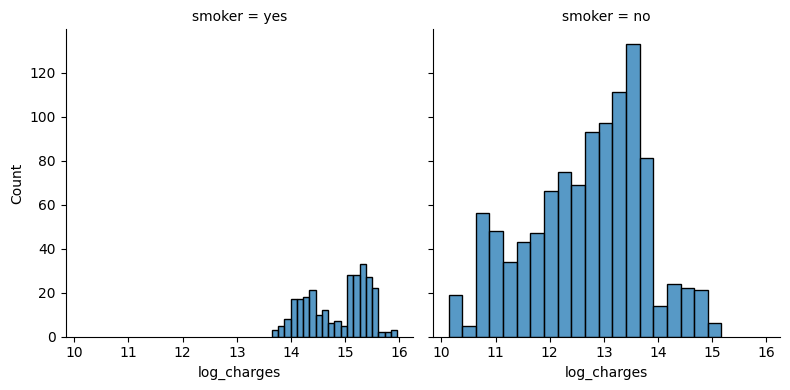

In [10]:
# Create a histogram stratified by smoker
g = sns.FacetGrid(insurance, col='smoker', height=4, aspect=1)
g.map(sns.histplot, 'log_charges', kde=False, bins=20)
plt.show()


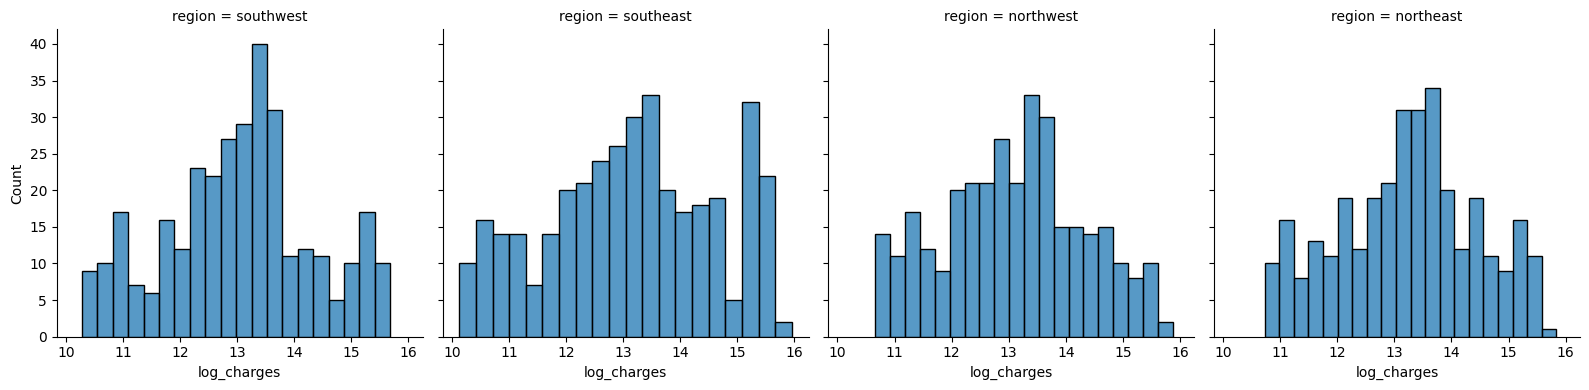

In [11]:
# Create a histogram stratified by region
g = sns.FacetGrid(insurance, col='region', height=4, aspect=1)
g.map(sns.histplot, 'log_charges', kde=False, bins=20)
plt.show()

Based on the histogram stratified by `sex`, we can see that the range of `log_charges` for females is narrower than that of males. This suggests that sex may be a useful variable to include in our model, as it may have an impact on medical charges.

For the histogram stratified by `smoker`, we can see that the range of `log_charges` for smokers is wider than that of non-smokers, and that the mean charge for smokers is higher than that of non-smokers. This suggests that smoking status is a useful variable to include in our model, as it appears to have a strong impact on medical charges.

For the histogram stratified by `region`, we can see that there is some variation in the range and mean of `log_charges` across different regions. However, the ranges and means are fairly similar across regions, so it is unclear whether including region in our model would be particularly useful.

Overall, it appears that `sex` and `smoker` are useful variables to include in our model, while `region` may not be particularly informative.

### Handling Categorical Variables

Encoding categorical variables with numerical values is important because most machine learning algorithms cannot work with categorical data directly. Instead, they require numerical data as input. In order to achieve this, we can use the `LabelEncoder` from scikit-learn library which converts categorical variables into numerical labels.

`LabelEncoder` is a class in scikit-learn that encodes categorical integer features into numerical values. It assigns a unique integer value to each category of the feature. For example, in the case of binary variables such as `sex` and `smoker`, we can encode `male` and `smoker` as `1` and `female` and `non-smoker` as `0`.

Once the encoding is done, we can perform mathematical computations on these encoded values to build our machine learning models.

In [12]:
# Instantiate labelencoder
le = LabelEncoder()

# Apply le on categorical feature columns
insurance[['sex', 'smoker']] = insurance[['sex', 'smoker']].apply(lambda col: le.fit_transform(col))

# View results
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,southwest,16884.92400,14.043448
1,18,1,33.770,1,0,southeast,1725.55230,10.752842
2,28,1,33.000,3,0,southeast,4449.46200,12.119415
3,33,1,22.705,0,0,northwest,21984.47061,14.424197
4,32,1,28.880,0,0,northwest,3866.85520,11.916945
5,31,0,25.740,0,0,southeast,3756.62160,11.875220
6,46,0,33.440,1,0,southeast,8240.58960,13.008532
7,37,0,27.740,3,0,northwest,7281.50560,12.830021
8,37,1,29.830,2,0,northeast,6406.41070,12.645301
9,60,0,25.840,0,0,northwest,28923.13692,14.819936


## Prepare the Data

After our analysis, we have identified the most important features for our model. We will now split the data into two parts - features (X) and target variable (y) based on these selected features.

In [13]:
# Create features X
X = insurance[['age', 'bmi', 'sex', 'smoker']]

# Create target variable
y = insurance['log_charges']

## Dividing The Data

To build the model, we first need to split our data into two parts:

- Training set: used to estimate the regression coefficients for each predictor in the model.
- Test set: used to evaluate the model's predictive ability on new data.

It's important not to use the test set to estimate coefficients because it represents new data that the model hasn't seen before. The prediction error on the test set gives us an idea of how well the model can generalize to new data.

In [14]:
# Split the data into training (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

Let's take a look at the shape after dividing the data into training and test sets.

In [15]:
X_train.shape, y_train.shape

((1003, 4), (1003,))

In [16]:
X_test.shape, y_test.shape

((335, 4), (335,))

## Build the Model

After dividing our data into a training and test set, we can now build our predictive linear model. In this process, we'll examine the regression coefficients and the coefficient of determination. Here are a few questions we can ask ourselves using only the training set:

- Do the coefficient values align with their correlation with the outcome?
- What does the coefficient of determination ($R^2$) reveal about the model's fit?
- How well does the model predict medical costs in the training set (MSE)?

In [17]:
# Define model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make model predictions on X_train
y_pred = lr.predict(X_train)

# Calculate MSE on log scale
log_mse = mean_squared_error(y_train, y_pred)

# Calculate MSE on the original scale
orig_mse = np.exp(mean_squared_error(y_train, y_pred))

# Calculate coefficient of determination (R2)
r2 = r2_score(y_train, y_pred)

Let's try to answer the questions we mentioned above:

In [18]:
print(f'Model coefficients:\n{lr.coef_}\n')
print(f'R2 score (log scale): {r2*100:.0f}\n')
print(f'MSE (log scale): {log_mse:.4f}\n')
print(f'MSE (original): ${orig_mse*1000:.0f}\n')

Model coefficients:
[ 0.05082522  0.01566292 -0.09607661  2.23860108]

R2 score (log scale): 74

MSE (log scale): 0.4456

MSE (original): $1561



We can draw the following observations based on the results:

- The coefficient values indicate that age and BMI have a positive impact on medical charges, while being female and a non-smoker have a negative impact. These values make sense as age and BMI are typically associated with higher medical costs, while being female and a non-smoker are typically associated with lower medical costs.
- The coefficient of determination (R2) suggests that the model explains approximately 74% of the variance in the target variable, log-transformed medical charges. This indicates that the model has a good fit and is able to capture a significant portion of the variability in medical charges.
- The MSE on the original scale suggests that the model has an average error of approximately \\$1,561 in predicting medical charges. This is a relatively high error, but it should be noted that the range of medical charges in the dataset is quite wide, with some charges exceeding \\$60,000.

In general, the model seems to perform reasonably well when predicting medical costs in the training set, but it's essential to keep in mind that these are optimistic values.

## Residual Diagnostics

Our predictive model for medical costs is now up and running! But before we proceed with a more detailed examination, we need to verify if the assumptions of linear regression hold true.

The error term $\epsilon_i$ measures how much the outcome $Y$ deviates from the combination of predictors that the model fits, which is given by:

$$\epsilon_i = Y_i - \beta_0 - \beta_1 X_1 - \beta_2 X_2 - ... - \beta_p X_p$$

Since we don't know the actual values of $\epsilon_i$, we rely on the residuals to estimate them. The residuals $e_i$ are computed as:

$$e_i = Y_i - \hat{Y_i}$$

These residuals should have similar characteristics to the actual error terms $\epsilon_i$. We will examine these residuals and evaluate the model's goodness of fit.

In [19]:
# Create dataframe
residual_df = pd.DataFrame()

# Store actual and fitted values in the dataframe
residual_df['acutal'] = y_train
residual_df['fitted'] = y_pred

# Calculate residuals of the model
residual_df['residuals'] = residual_df['acutal'] - residual_df['fitted']
residual_df = residual_df.reset_index(drop=True)
residual_df.head()

,acutal,fitted,residuals
0,11.200266,11.741977,-0.541711
1,12.083626,12.086072,-0.002446
2,13.197116,13.365569,-0.168453
3,15.365336,15.344170,0.021166
4,13.107099,13.038360,0.068739


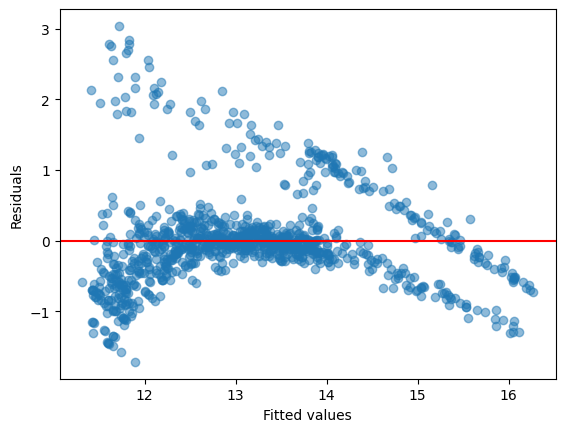

In [20]:
# Create a scatter plot of fitted values vs residuals
plt.scatter(residual_df['fitted'], residual_df['residuals'], alpha=0.5)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='-')

# Set x and y axis labels
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

Based on the scatter plot, we can answer the following questions:

- Do the residuals seem to center around 0 over the range of the fitted values?
    - No, the residuals do not seem to center around 0 over the range of the fitted values.
- Do the residuals seem to remain in a constant "band" around 0 over the range of fitted values? If not, what does the trend look like?
    - No, the residuals do not seem to remain in a constant "band" around 0 over the range of fitted values. As fitted values get larger, the residuals trend downward.
- Do the residuals seem to trend with any of the predictors in the model?
    - We cannot determine if the residuals trend with any of the predictors in the model based on the scatter plot provided.
    
## Interpreting the Model

One of the best qualities of a linear model is its interpretability of the estimated coefficients. The model provides a way to understand how changes in predictors relate to changes in the outcome (without causing them).

For a linear model with multiple predictors...

$Y_i = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon_i$

...we interpret $\beta_1$ as the average increase in $Y$ for a unit increase in $X_1$, holding the other predictors constant. We can apply this interpretation to each variable in the model to make it as interpretable as possible.

From a hospital administrator's perspective, the regression coefficients could represent actionable plans to improve medical care efficiency. Based on the model interpretations, administrators may consider reallocating resources to hospitals with vulnerable patient populations.

In [21]:
intercept = lr.intercept_
intercept

10.247741810450814

In [22]:
coefficients = lr.coef_
coefficients

array([ 0.05082522,  0.01566292, -0.09607661,  2.23860108])

Let's draw some insights by interpreting the intercept and coefficients values:

1. The intercept of the model, 10.2477, represents the expected value of the response variable (i.e., medical charges) when all the predictors (age, bmi, sex, and smoker) are equal to zero. However, the intercept may not have a meaningful interpretation in this case because all of the predictors are unlikely to be exactly zero in reality. For example, age cannot be negative, and there are no patients with a BMI of zero in the dataset.
2. Let's interpret the regression coefficients for two predictors:

    - For the predictor `bmi`, a one-unit increase in BMI is associated with an average increase in medical charges of 0.0157 units, holding all other predictors constant. In other words, a patient who has a BMI that is one unit greater than another patient, but is otherwise similar to the other patient in terms of age, sex, and smoking status, can be expected to have medical charges that are 0.0157 units higher on average.
    - For the predictor `smoker`, a patient who is a smoker has an average increase in medical charges of 2.2386 units, holding all other predictors constant, compared to a patient who is a non-smoker. In other words, all else being equal, smokers can be expected to have medical charges that are 2.2386 units higher on average than non-smokers.
    
Note: we are interested in the linear model as a *predictive model*, not as an inferential model. So, we will have no way of knowing if the relationship is statistically significant.

## Final Model Evaluation

Remember that the training error is typically overly optimistic, so it should not be used as the final evaluation of the model's predictive ability. To assess how well the model performs on new, unseen data, we need to evaluate it on the test data. The test data represents a set of new observations that the model has not seen during training. In order to use the model in real-world scenarios, the predictions should be accurate on any new observations.

In [23]:
# Make model predictions on X_test
test_pred = lr.predict(X_test)

# calculate MSE in the orignal scale
test_mse = np.exp(mean_squared_error(y_test, test_pred))

print(f'MSE test: {test_mse:.4f}')
print(f'MSE train: {orig_mse:.4f}')

MSE test: 1.5676
MSE train: 1.5615


The mean squared error on the test set is slightly higher than the one on the training set. The difference between the two values is relatively small, but it indicates that the model may have slightly overfitted the training data. However, without further analysis, it is difficult to determine whether the difference is significant enough to warrant concern. Overall, the values suggest that the model has a decent level of predictive accuracy, but additional evaluation may be necessary to fully assess its performance.

As next steps, we may want to try to improve the model with more predictors or more complex predictors such as quadratic terms. We may also want to use categorical predictors if the distribution of the outcome is appreciably different between categories.

## Conclusion

After conducting our analysis, we can conclude that the linear regression model for predicting medical costs based on age, BMI, sex, and smoking status seems to make sense in terms of interpretation. The regression coefficients indicate that as BMI and smoking status increase, medical charges also tend to increase, holding all other predictors constant. Similarly, the intercept value represents the expected medical charges when all predictors are zero, which may not be meaningful in real-world scenarios, but it provides a baseline for interpreting the other coefficients.

When comparing the model's predictive ability on the training and test sets, we found that the model performed slightly better on the test set, with a slightly lower MSE value. This could be because the model was overfitting the training data, and the test set provided a more realistic evaluation of the model's performance. However, we should note that the difference in MSE values between the training and test sets was relatively small, and we would need to conduct additional analysis to determine if this difference is significant.

In terms of the MSE value, we can interpret it as a measure of the model's accuracy in predicting medical charges based on the four predictors. A lower MSE value indicates that the model has less error in predicting medical charges, and therefore, it could be considered more useful for an insurance company. However, it is important to note that the MSE value is only one measure of the model's performance, and other factors, such as the model's interpretability, computational efficiency, and scalability, should also be considered when evaluating the model's usefulness for an insurance company.

Overall, our analysis suggests that the linear regression model can provide useful insights into the factors that contribute to medical charges and has decent predictive accuracy. However, further analysis, including evaluating additional models and incorporating more predictors, may be necessary to fully assess the model's usefulness for an insurance company.